# Resolución de ejercicios: Capítulo Machine Learning
## Autores: Eduardo Cuadros, Juan Barrera



# Árbol de decisión

El árbol de decisión es un algoritmo  de aprendizaje supervisado usado para modelar decisiones en forma jerárquica usado tanto para problemas de clasificación como de regresión. Este algoritmo divide los datos en subconjuntos basándose en las características de los datos. Cada nodo del árbol representa una decisión sobre un atributo, y cada rama representa el resultado de esa decisión.

### Ejemplo de implementación:
Se hará la clasificación de vinos usando el dataset *Wine*, el cual tiene 178 muestras y 13 características. Para poder visualizar las clasificaciones en un plano 2D, usarémos solo *Alcohol* y *Malic Acid* como características de entrenamiento.

1. Se importan las librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Se carga el dataset y se divide en datos de entrenamiento y prueba. También se le hace preprocesamiento a los datos para normalizarlos.

In [3]:
wine = datasets.load_wine()
X = wine.data[:, :2]
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Lo siguiente que hacemos crear el modelo de árbol de decisión y entrenarlo con los datos de entrenamiento.

In [5]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

Una vez entrenado el modelo, creamos una malla para cubrir el espacio de características y visualizar los datos. Luego realizamos las predicciones para las etiquetas en cada punto de la malla.

In [7]:
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100),
                     np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Ahora visualizamos la división de las clases. Los puntos de entrenamiento se muestran en el gráfico con diferentes colores para cada clase, y se dibuaja la frontera de decisión.

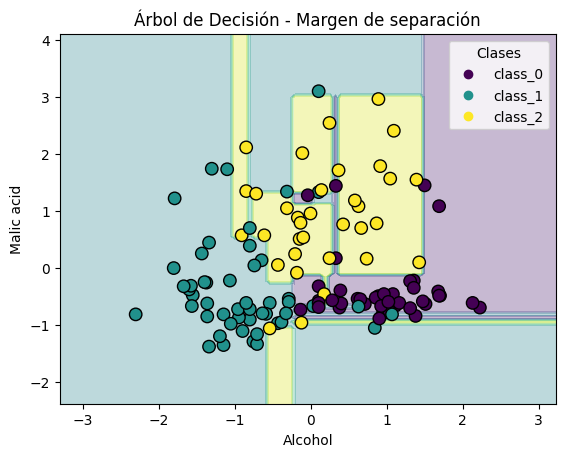

In [8]:
plt.contourf(xx, yy, Z, alpha=0.3)

scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=80)

handles, _ = scatter.legend_elements()
plt.legend(handles, wine.target_names, title="Clases")

plt.title('Árbol de Decisión - Margen de separación')
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')
plt.show()

Se puede observar que la clasificación se hace bastante bien, aunque se tienen algunos falsos positivos, la mayoría de los datos están bi en clasificados.